In [73]:
#Project - 7 July

In [74]:
## Loading the libraries with alias
import pandas as pd 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns

In [75]:
# Read data from file 'insurance.csv' 
data = pd.read_csv("insurance.csv") 

In [76]:
# Preview the first 5 lines of the loaded data 
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# dataframe.size 
size = data.size   
# dataframe.ndim 
df_ndim = data.ndim 
# series.ndim 
series_ndim = data["charges"].ndim 
# printing size and shape 
print("Size = {}\nShape ={}\nShape[0] x Shape[1] = {}". 
format(size, shape, shape[0]*shape[1])) 
  
# printing ndim 
print("ndim of dataframe = {}\nndim of series ={}". 
format(df_ndim, series_ndim)) 

Size = 9366
Shape =(1338, 7)
Shape[0] x Shape[1] = 9366
ndim of dataframe = 2
ndim of series =1


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [44]:
# dataframe.shape 
shape = data.shape 
print (shape)

(1338, 7)


In [46]:
# See if any value is missing 
data.isnull().values.any()

False

In [65]:
data.describe()

,age,bmi,children,charges,bmi_int
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,30.169656
std,14.049960,6.098187,1.205493,12110.011237,6.119875
min,18.000000,15.960000,0.000000,1121.873900,15.000000
25%,27.000000,26.296250,0.000000,4740.287150,26.000000
50%,39.000000,30.400000,1.000000,9382.033000,30.000000
75%,51.000000,34.693750,2.000000,16639.912515,34.000000
max,64.000000,53.130000,5.000000,63770.428010,53.000000


In [64]:
data.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
bmi_int     0.282126
dtype: float64

In [66]:
#Here are a few inferences, we can draw by looking at the output of describe() function:

#Age, BMI, Children & Charges fields have no missing values.

#Average age of the people is 39

#Possible skew in the charges data as seen in skew function. Also, while comparing the mean to the median, i.e. the 50% figure, we see a significant difference.

In [78]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [21]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

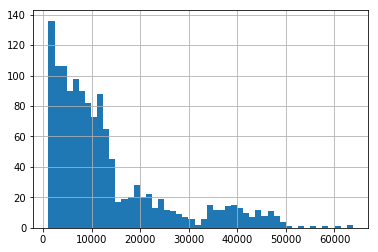

In [22]:
data['charges'].hist(bins=50)

In [23]:
#Here we observe that there are few extreme values. 
#This is also the reason why 50 bins are required to depict the distribution clearly.

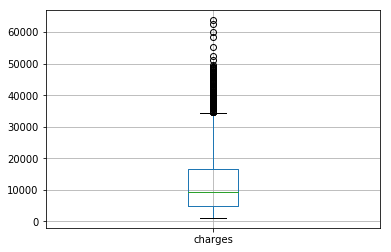

In [24]:
data.boxplot(column='charges')

This confirms the presence of a lot of outliers/extreme values in 'Charges'

This can be attributed to the BMI of the people. 
Part of this can be driven by the fact that we are looking at people with different age group. 
Let's check outliers in all columns

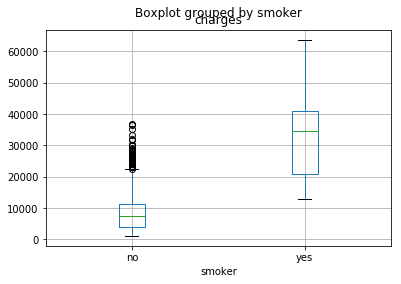

In [28]:
data.boxplot(column='charges', by = 'smoker')

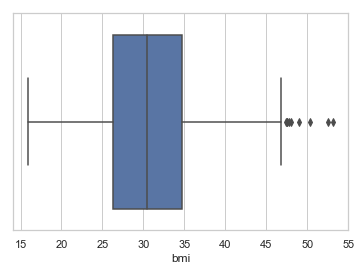

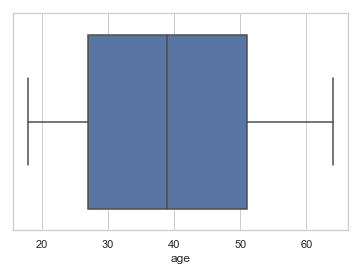

In [136]:
sns.boxplot(x='bmi',data=data)
plt.show()

sns.boxplot(x='age',data=data)
plt.show()


So from above graph we can see there are outliers in bmi column but not in age column.

Data distribution


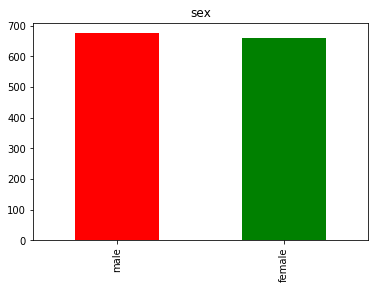

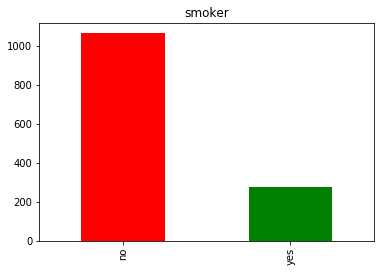

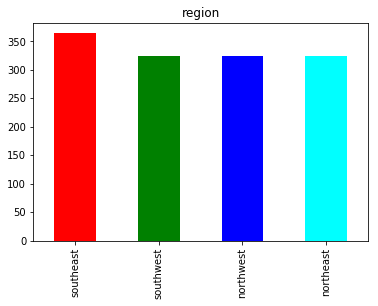

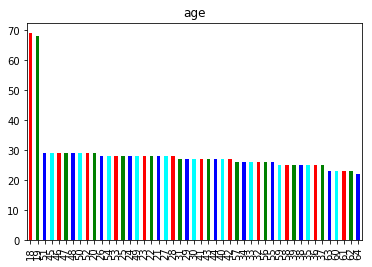

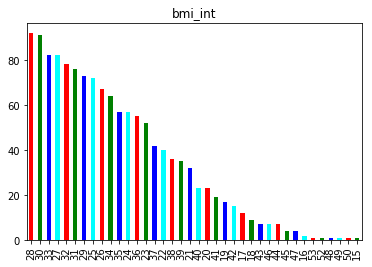

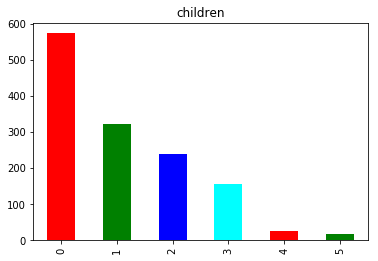

In [70]:
#Changing the data type of BMI

data['bmi_int'] = data['bmi'].apply(lambda x: int(x))
variables = ['sex','smoker','region','age','bmi_int','children']

# data distribution analysis
print('Data distribution')
for v in variables:
    data = data.sort_values(by=[v])
    data[v].value_counts().plot(kind = 'bar', color=['red', 'green', 'blue', 'cyan'])
    plt.title(v)
    plt.show()

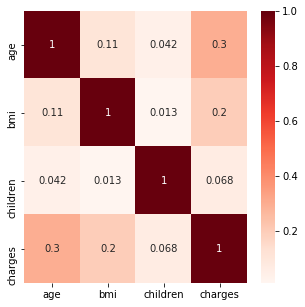

In [91]:
#To find correlation among the columns

plt.figure(figsize=(5,5))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

The correlation coefficient has values between 0 to 1

From the above heatmap, we can determine that there is a positive correlation between age & charges, and also BMI & charges

# Display graphically the distribution of bmi, age & charges column

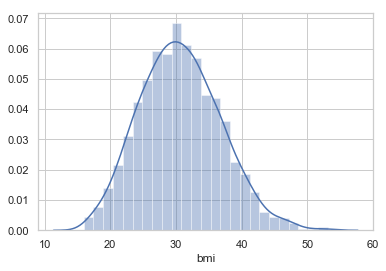

In [133]:
sns.distplot(data['bmi'])
plt.show()

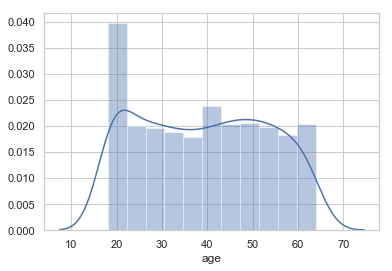

In [131]:
sns.distplot(data['age'])
plt.show()

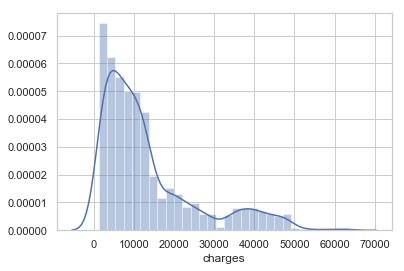

In [132]:
sns.distplot(data['charges'])
plt.show()

Mean Cost Distribution:


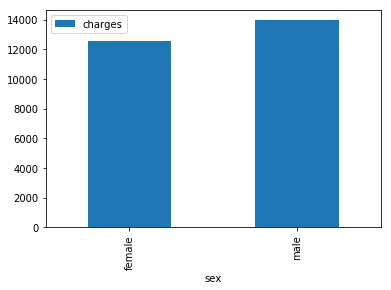

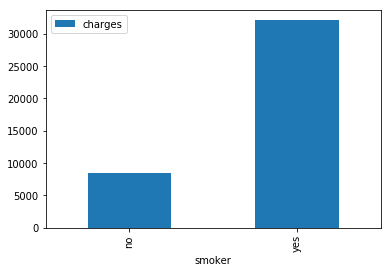

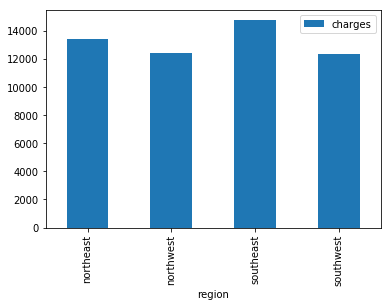

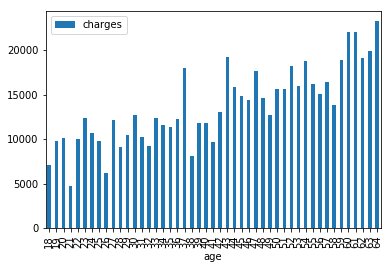

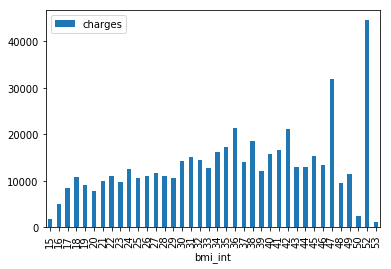

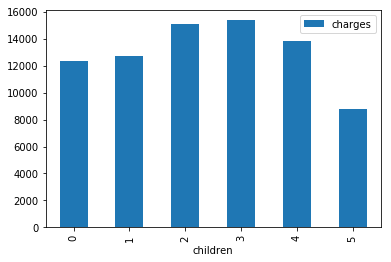

In [94]:
#Calculating the mean cost distribution
data['bmi_int'] = data['bmi'].apply(lambda x: int(x))
variables = ['sex','smoker','region','age','bmi_int','children']

print('Mean Cost Distribution:')
for v in variables:
    group_data = data.groupby(pd.Grouper(key=v)).mean()
    group_data = group_data.sort_index()
    group_data.plot(y = ['charges'],kind = 'bar')
    plt.show()

Charges are higher for higher age group, BMI & smokers.

Variables pairplot by smoking habits:


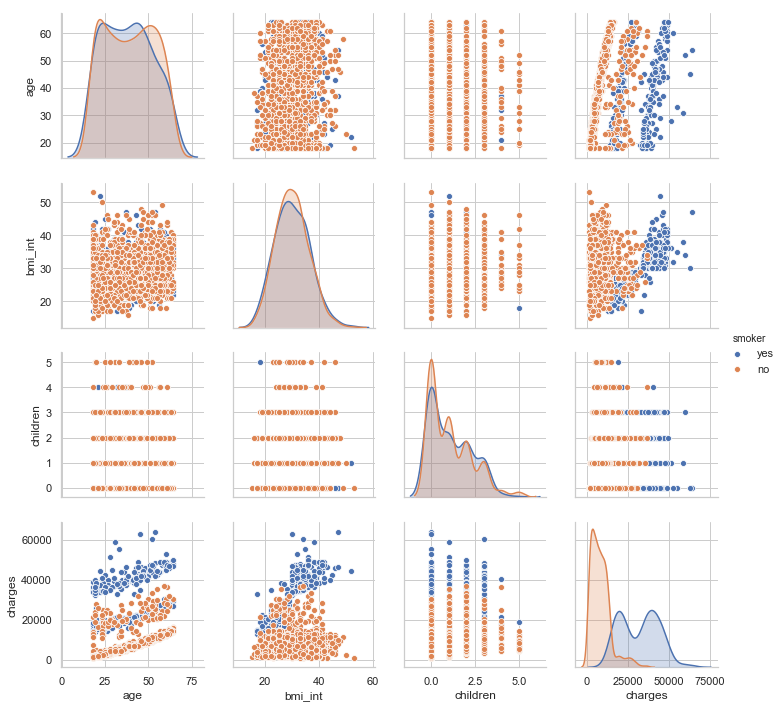

In [144]:
#variables pairplot

print('Variables pairplot by smoking habits:')
variables = ['sex','smoker','region','age','bmi_int','children','charges']
sns_plot = sns.pairplot(data[variables], hue='smoker')
plt.show()

Variables pairplot by sex:


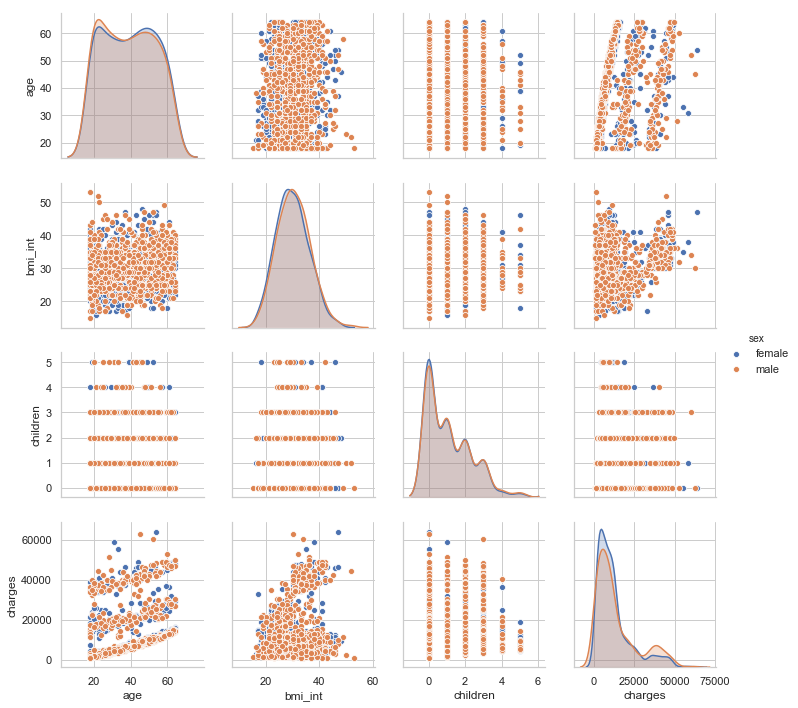

In [143]:
print('Variables pairplot by sex:')
variables = ['sex','smoker','region','age','bmi_int','children','charges']
sns_plot = sns.pairplot(data[variables], hue='sex')
plt.show()

Variables pairplot by region:


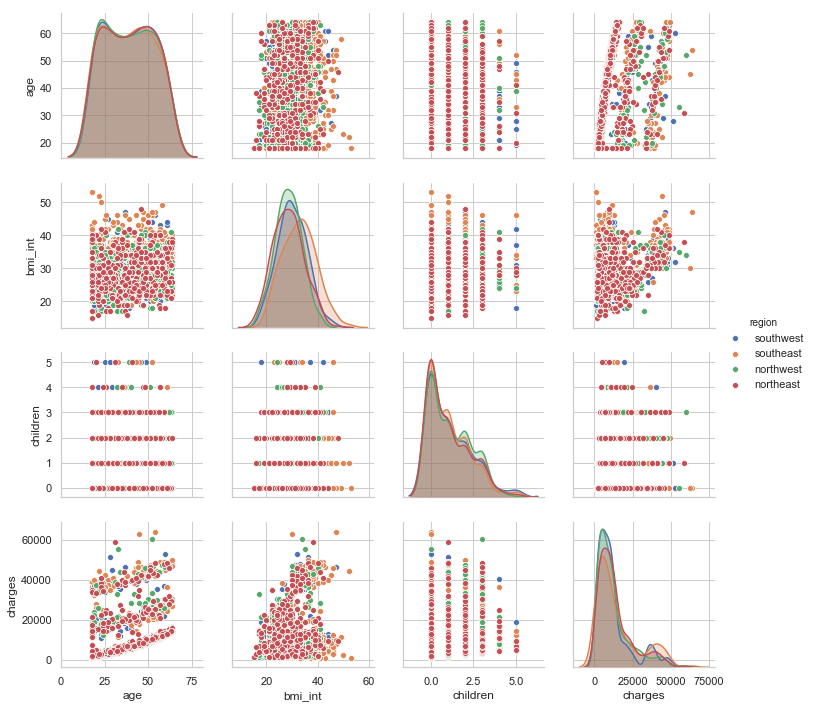

In [145]:
print('Variables pairplot by region:')
variables = ['sex','smoker','region','age','bmi_int','children','charges']
sns_plot = sns.pairplot(data[variables], hue='region')
plt.show()

# Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [134]:
pd.DataFrame([stats.skew(data['age']),stats.skew(data['bmi']),stats.skew(data['charges'])],index=['age','bmi','charges'],columns=['skewness'])

,skewness
age,0.055610
bmi,0.283729
charges,1.514180


# Do charges of people who smoke differ significantly from the people who don't?

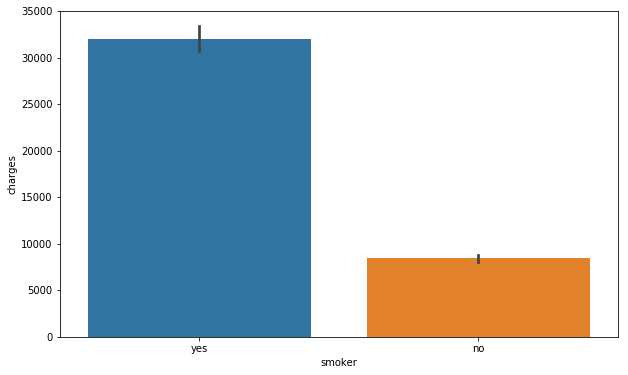

In [103]:
plt.figure(figsize=(10,6))
sns.barplot(x='smoker',y='charges',data=data)
plt.show()

From the above plot, we see that smoking habits have an effect on the medical charges. Let's test this theory

Null Hypothesis--> H0 = "Smoking habits have no effect on charges"
Alternate hypothesis--> H1 = "Smoking habits have effect on charges" 

In [174]:
x = np.array(data[data['smoker'] == 'yes']['charges'])
y = np.array(data[data['smoker'] == 'no']['charges'])
t,p_value = stats.ttest_ind(x,y,axis =0) #performing an independent T-test
if p_value <0.05:
    print("Smoking habits have a significant effect on charges(reject H0)")
else:
    print("Smoking habits have no effect on charges(accept H0)")

Smoking habits have a significant effect on charges(reject H0)


# Does bmi of males differ significantly from that of females?

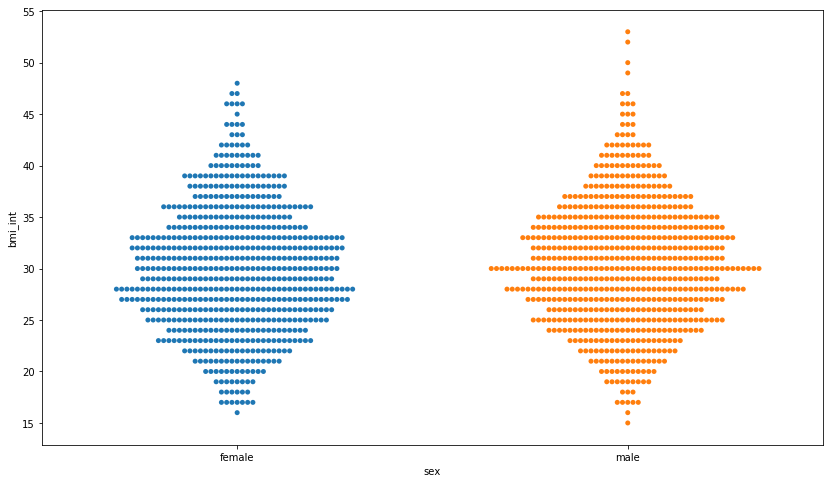

In [110]:
plt.figure(figsize=(14,8))
sns.swarmplot(x='sex',y='bmi_int',data=data)
plt.show()

From the above plot, we can see that there isn't much difference in the BMI for males as compared to females, but the male BMI has reached significant high BMI of 53 whereas for female, the highest is at 48. Also the data has an almost equal distribution of male & female data points.

We will test this out with an independent T-test

Null Hypothesis--> H0 = "BMI is not gender specific"
Alternate hypothesis--> H1 = "BMI is gender specific" 

In [148]:
x = np.array(data[data['sex'] == 'male']['bmi'])#selecting bmi values corresponding to male as an array
y = np.array(data[data['sex'] == 'female']['bmi'])#selecting bmi values corresponding to female as an array
t,p_value = stats.ttest_ind(x,y,axis =0)#performing an independent T-test
if p_value <0.05:
    print("BMI Is Gender Specific(reject H0)")
else:
    print("BMI is not Gender Specific(accept H0)")

BMI is not Gender Specific(accept H0)


# Is the proportion of smokers significantly different in different genders?

sex,female,male
smoker,,
no,547,517
yes,115,159


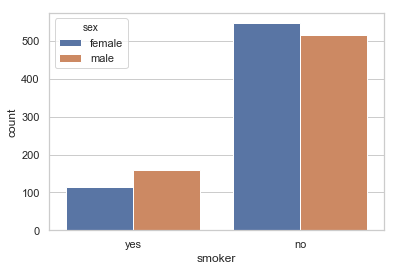

In [149]:
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="smoker", hue= "sex", data=data)

pd.crosstab(data['smoker'],data['sex'])

From the above plot, we can infer that the proportion of smokers in male population is significantly higher as compared to the female population

We will test this out using Chi-square test

Null Hypothesis--> H0 = "there is no significant difference in proportion of smokers in different genders"
Alternate hypothesis--> H1 = "there is a significant difference in proportion of smokers in different genders" 

In [154]:
#F1= expected value of smoker=no and sex=female
#M1 = expected value of smoker=no and sex= male
#F2 = expected value of smoker=yes and sex= female
#M2 = expected value of smoker=yes and sex= male

F1 = 1064*(662/1338)
print("expected value of smoker=no and sex=female is {}".format(F1))
M1 = 1064*(676/1338)
print("expected value of smoker=no and sex= male is {}".format(M1))
F2 = 274*(662/1338)
print("expected value of smoker=yes and sex= female is {}".format(F2))
M2 = 274*(676/1338)
print("expected value of smoker=yes and sex= male is {}".format(M2))

#chi-square = summation((observed-expected)^2/expected)
chiF1 = np.square(547-F1)/F1
print("chiF1 is {}".format(chiF1))
chiM1 = np.square(517-M1)/M1
print("chiM1 is {}".format(chiM1))
chiF2 = np.square(115-F2)/F2
print("chiF2 is {}".format(chiF2))
chiM2 = np.square(159-M2)/M2
print("chiM2 is {}".format(chiM2))

chisquare = chiF1+chiM1+chiF2+chiM2
print("chisquare is {}".format(chisquare))

degree_of_freedom = (2-1)*(2-1)
print("The degree of freedom is {}".format(degree_of_freedom))

expected value of smoker=no and sex=female is 526.4334828101644
expected value of smoker=no and sex= male is 537.5665171898356
expected value of smoker=yes and sex= female is 135.56651718983557
expected value of smoker=yes and sex= male is 138.43348281016443
chiF1 is 0.8034854224352866
chiM1 is 0.7868451917931356
chiF2 is 3.120103976172045
chiM2 is 3.0554864382039844
chisquare is 7.765921028604452
The degree of freedom is 1


In [152]:
# The critical value for alpha of 0.05(95% confidence) is 3.88
#since the statistics is much larger than 3.84, we have sufficient evidence to reject the H0(null hypothesis)

if chisquare<3.88:
    print("there is no significant difference in proportion of smokers in different genders(accept H0)")
else:
    print("there is a significant difference in proportion of smokers in different genders(reject H0)")

there is a significant difference in proportion of smokers in different genders(reject H0)


# Is the distribution of bmi across women with no children, one child and two children, the same ?

In [127]:
pd.crosstab(data['children'],data['smoker'])

smoker,no,yes
children,,
0,459,115
1,263,61
2,185,55
3,118,39
4,22,3
5,17,1


Null Hypothesis--> H0 = "The distribution of BMI across women with no children, one child and two children is not the same"

Alternate hypothesis--> H1 = "The distribution of BMI across women with no children,one child and two children is the same"

In [158]:

#Creating the data frame of females having children less than or equal to 2

df = data[(data['children']<=2) & (data['sex']=='female')]

df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_int
0,19,female,27.90,0,yes,southwest,16884.92400,27
5,31,female,25.74,0,no,southeast,3756.62160,25
6,46,female,33.44,1,no,southeast,8240.58960,33
9,60,female,25.84,0,no,northwest,28923.13692,25
11,62,female,26.29,0,yes,southeast,27808.72510,26


In [164]:
DFshape=df.shape
print(DFshape)

(566, 8)


0.011012784351454136
0.7937600294539013


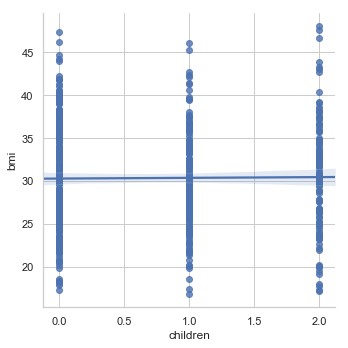

In [173]:
#plot the graph between bmi and children

from scipy.stats import pearsonr
x = (df['bmi'])

corr = (df['children'])

corr, p_value = pearsonr(x, corr)
print (corr)

print (p_value)

sns.lmplot(x="children", y="bmi", data=df)

From the above, we can see that p value is 0.79 which means that the distribution of BMI across women with no children, one child and two children is the same and we reject H0(Null Hypothesis)